##1.How do you create a simple perceptron for basic binary classification.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step_function(x):
    return 1 if x >= 0 else 0


In [3]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.zeros(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, x):
        summation = np.dot(x, self.weights[1:]) + self.weights[0]
        return step_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                # Update weights and bias
                self.weights[1:] += self.learning_rate * error * X[i]
                self.weights[0] += self.learning_rate * error


In [5]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 1])


In [6]:
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)


In [7]:
for i in range(len(X)):
    print(f"Input: {X[i]}, Prediction: {perceptron.predict(X[i])}")


Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 1


##2. How can you build a neural network with one hidden layer using Keras.


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [11]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 1])


In [13]:
model = Sequential([
    Dense(4, activation='relu', input_shape=(2,)),
    Dense(1, activation='sigmoid')
])


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
model.fit(X, y, epochs=100, verbose=1)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 0.7958
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0000e+00 - loss: 0.7932
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: 0.7907
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: 0.7882
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 0.7857
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0000e+00 - loss: 0.7833
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 0.7808
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 0.7784
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 0.7759
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0000e+00 - loss: 0.7735
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0000e+00 - loss: 0.7711
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [16]:
predictions = model.predict(X)
print((predictions > 0.5).astype(int))  # Convert probabilities to 0 or 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[1]
 [1]
 [1]
 [1]]


##3. How do you initialize weights using the Xavier (Glorot) initialization method in Keras.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform

model = Sequential([
    Dense(4, activation='relu', kernel_initializer=GlorotUniform(), input_shape=(2,)),  # Hidden Layer
    Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform())  # Output Layer
])


In [18]:
from tensorflow.keras.initializers import GlorotNormal

model = Sequential([
    Dense(4, activation='relu', kernel_initializer=GlorotNormal(), input_shape=(2,)),
    Dense(1, activation='sigmoid', kernel_initializer=GlorotNormal())
])


##4. How can you apply different activation functions in a neural network in Keras.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),
    Dense(6, activation='tanh'),
    Dense(4, activation='sigmoid'),
    Dense(1, activation='softmax')
])


##5. How do you add dropout to a neural network model to prevent overfitting.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


##6. How do you manually implement forward propagation in a simple neural network.


In [24]:
X = np.array([0.5, 0.8])

W = np.array([0.2, -0.4])

b = 0.1


In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [26]:

Z = np.dot(W, X) + b


A = sigmoid(Z)


print("Output after forward propagation:", A)


Output after forward propagation: 0.4700359482354282


##7. How do you add batch normalization to a neural network model in Keras.


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

model = Sequential([
    Dense(64, input_shape=(10,)),
    BatchNormalization(),
    Activation('relu'),
    Dense(32),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])


##8. How can you visualize the training process with accuracy and loss curves.


In [31]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from sklearn.model_selection import train_test_split

num_samples = 1000
num_features = 10
X = np.random.rand(num_samples, num_features)
y = np.random.randint(0, 2, num_samples)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Create data here


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.4970 - loss: 0.6945 - val_accuracy: 0.5300 - val_loss: 0.6933
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5491 - loss: 0.6912 - val_accuracy: 0.5250 - val_loss: 0.6938
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5218 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5599 - loss: 0.6871 - val_accuracy: 0.5200 - val_loss: 0.6948
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5570 - loss: 0.6865 - val_accuracy: 0.4700 - val_loss: 0.6967
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5721 - loss: 0.6818 - val_accuracy: 0.4850 - val_loss: 0.6974
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5420 - loss: 0.6851 - val_accuracy: 0.5250 - val_loss: 0.6970
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5481 - loss: 0.6845 - val_accuracy: 0.5300 - va

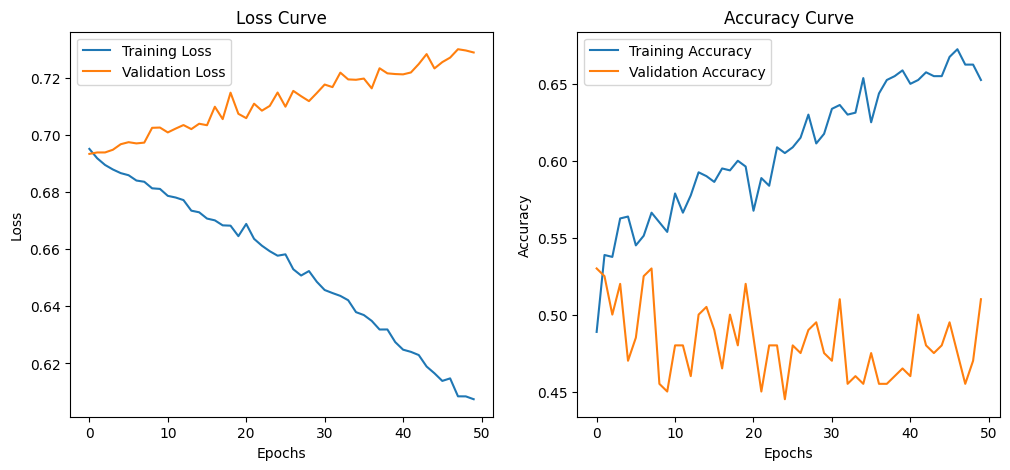

In [32]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


fig, ax = plt.subplots(1, 2, figsize=(12, 5))


ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(val_loss, label='Validation Loss')
ax[0].set_title('Loss Curve')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()


ax[1].plot(train_acc, label='Training Accuracy')
ax[1].plot(val_acc, label='Validation Accuracy')
ax[1].set_title('Accuracy Curve')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()


plt.show()


##9. How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients.


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


##10. How can you create a custom loss function in Keras.


In [36]:
import tensorflow as tf

def custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    penalty = tf.reduce_mean(tf.square(y_pred)) * 0.1
    return mse + penalty


model.compile(optimizer='adam', loss=custom_loss, metrics=['accuracy'])


##11. can you visualize the structure of a neural network model in Keras?


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)